<a href="https://colab.research.google.com/github/zzhining/time_series_basic/blob/main/stock_market_article_scrap_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신문기사 수집 및 시각화 
1. 특정일자의 신문기사를 수집
2. 핵심어를 워드클라우드로 표시

# 신문기사 수집
----

## 1) 라이브러리 불러오기

In [1]:
import requests
import pandas as pd 
from bs4 import BeautifulSoup

## 2) 신문기사 스크래핑

In [2]:
url = 'https://finance.naver.com/news/mainnews.naver?date=2022-12-15'
r = requests.get(url)
print(r)

<Response [200]>


## 3) 신문기사 파싱

In [3]:
soup = BeautifulSoup(r.text, 'lxml')
post_list = soup.find_all('li',{'class':'block1'})

In [6]:
# 제목, 소제목, 날짜 리스트
title_list = []
subtitle_list = []
url_list = []

num = 0
for post in post_list:
    num += 1
    title = post.find('dd',{'class': 'articleSubject'})
    if title is None:
      title = post.find('dt',{'class': 'articleSubject'})
    title = title.text.strip()
    subtitle = post.find('dd', {'class': 'articleSummary'}).contents[0].strip()
    url = post.find('a').get('href')
    # print(f'{num}. title:{title}\n subtitle:{subtitle}\n url:{url} \n')

    title_list.append(title)
    subtitle_list.append(subtitle)
    url_list.append(url)
    
#데이터프레임 만들기
df = pd.DataFrame({'title': title_list, 'subtitle': subtitle_list, 'url': url_list})
df

,title,subtitle,url
0,파월의 '매' 무섭지 않아…달러 약세에 환율 1290원대 등락[외환브리핑],"美 연준 최종금리 중간값 5.1%로 0.5%p 상향파월 ""인플레 하락 추세 확신들때...",/news/news_read.naver?article_id=0005387391&of...
1,"금리인상폭 축소에도 美증시↓...""내년이 문제""[뉴욕마감](종합)","FILE - In this Monday, Sept. 21, 2020, file ph...",/news/news_read.naver?article_id=0004829275&of...
2,"[모닝브리핑] 파월 '긴축유지' 발언에 증시 하락…메시 vs 음바페, 우승 다툼","◆ 美 Fed, 기준금리 5bp 인상…한국과 1.25%P 격차미국 중앙은행(Fed)...",/news/news_read.naver?article_id=0004787545&of...
3,"""금리 더 올려야"", 연준 '매파' 메시지에 美증시↓[뉴욕마감]","FILE - In this Monday, Sept. 21, 2020, file ph...",/news/news_read.naver?article_id=0004829263&of...
4,FOMC 결과 앞두고 나스닥 0.5% 출발 [데일리 국제금융시장],"내년 최종금리·파월 의장 기자회견에 관심집중델타항공, 내년 어닝 호조 가능성에 2%...",/news/news_read.naver?article_id=0004133657&of...


## 4) 신문기사 본문 크롤링

In [5]:
baseUrl = 'https://finance.naver.com'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
r = requests.get(baseUrl+df['url'][0],  headers = headers)
soup = BeautifulSoup(r.text, 'lxml')
articleCont = soup.find('div', {'class': 'articleCont'})
articleContent = articleCont.text
spam = articleCont.find('div', {'class': 'link_news'})
articleContent = articleContent.replace(spam.text, '')
articleContent

'\n美 연준 최종금리 중간값 5.1%로 0.5%p 상향파월 "인플레 하락 추세 확신들때까지 금리 인하 없다"경제성장률 0.5%로 내린 연준에 시장 \'덜 매파적\'달러인덱스 103.63으로 FOMC 결과 이전보다 하락(사진=AFP 제공)[이데일리 최정희 기자] 제롬 파월 미 연방준비제도(Fed·연준) 의장의 매파(긴축 선호) 스탠스에도 달러인덱스는 하락했다. 시장에선 연준의 상향 조정한 최종금리 수준보다 경제성장률을 0%대로 내린 것에 주목하며 연준이 계획한 대로 금리 경로를 유지하기 어려울 것으로 내다봤다. 매파 연준과 이를 믿지 않는 시장 분위기 속에 원·달러 환율은 1290원대에서 등락하는 움직임을 보일 것으로 예측된다. 15일 서울외국환중개에 따르면 간밤 뉴욕차액결제선물환(NDF) 시장에서 거래된 원·달러 1개월물은 1294.0원에 최종 호가됐다. 최근 1개월물 스와프포인트(-1.60원)를 고려하면 이날 환율은 전 거래일 종가(1296.3원)보다 0.70원 하락 개장할 것으로 보인다. 1290원 중반대에 개장한 환율은 증시 등의 흐름에 따라 방향성 찾기에 돌입할 전망이다. 연준은 12월 연방공개시장위원회(FOMC) 회의에서 정책금리를 0.5%포인트 올린 4.25~4.5%로 결정, 시장 예상치에 부합했다. 가장 큰 관심이었던 금리 점도표상 내년 최종금리는 중간값 5.1%로 9월(4.6%)보다 0.5%포인트 상향 조정됐다. 이는 최종금리를 5~5.25%까지 올릴 수 있다는 관측이라 현 수준보다 0.75%포인트 높다. 시장 전망(4.75~5%) 대비 0.25%포인트 더 높은 수준이다. 파월 의장은 “아직 정책스탠스가 충분히 제약적이지 않고 이를 반영해 점도표에서 19명 FOMC 위원 중 17명이 내년 금리를 5% 이상으로 답변했다”며 “인플레이션이 지속적으로 하락 추세에 있다는 확신이 들 때까지 금리 인하는 없을 것”이라고 매파 발언을 쏟아냈다. 다만 시장은 예상보다 ‘덜 매파적’이었다고 평가했다. 연준이 경제성장률을 내년 1.2%에서 0.5%로 하향 조정

In [7]:
def get_gisa(subUrl):
    baseUrl = 'https://finance.naver.com'
    r = requests.get(baseUrl+subUrl)

    soup = BeautifulSoup(r.text, 'lxml')
    articleCont = soup.find('div', {'class': 'articleCont'})    
    articleContent = articleCont.text
    spam = articleCont.find('div', {'class': 'link_news'})
    articleContent = articleContent.replace(spam.text, '')

    gisaList = []  
    gisaList.append(articleContent)

    return "".join(gisaList)

In [10]:
def get_total_gisa(df):
  totalGisa = []
  for i in range(len(df)):
    subUrl = df['url'][i]
    totalGisa.append(get_gisa(subUrl))
  return "".join(totalGisa)

In [11]:
totalGisa = get_total_gisa(df)

In [12]:
totalGisa

'\n美 연준 최종금리 중간값 5.1%로 0.5%p 상향파월 "인플레 하락 추세 확신들때까지 금리 인하 없다"경제성장률 0.5%로 내린 연준에 시장 \'덜 매파적\'달러인덱스 103.63으로 FOMC 결과 이전보다 하락(사진=AFP 제공)[이데일리 최정희 기자] 제롬 파월 미 연방준비제도(Fed·연준) 의장의 매파(긴축 선호) 스탠스에도 달러인덱스는 하락했다. 시장에선 연준의 상향 조정한 최종금리 수준보다 경제성장률을 0%대로 내린 것에 주목하며 연준이 계획한 대로 금리 경로를 유지하기 어려울 것으로 내다봤다. 매파 연준과 이를 믿지 않는 시장 분위기 속에 원·달러 환율은 1290원대에서 등락하는 움직임을 보일 것으로 예측된다. 15일 서울외국환중개에 따르면 간밤 뉴욕차액결제선물환(NDF) 시장에서 거래된 원·달러 1개월물은 1294.0원에 최종 호가됐다. 최근 1개월물 스와프포인트(-1.60원)를 고려하면 이날 환율은 전 거래일 종가(1296.3원)보다 0.70원 하락 개장할 것으로 보인다. 1290원 중반대에 개장한 환율은 증시 등의 흐름에 따라 방향성 찾기에 돌입할 전망이다. 연준은 12월 연방공개시장위원회(FOMC) 회의에서 정책금리를 0.5%포인트 올린 4.25~4.5%로 결정, 시장 예상치에 부합했다. 가장 큰 관심이었던 금리 점도표상 내년 최종금리는 중간값 5.1%로 9월(4.6%)보다 0.5%포인트 상향 조정됐다. 이는 최종금리를 5~5.25%까지 올릴 수 있다는 관측이라 현 수준보다 0.75%포인트 높다. 시장 전망(4.75~5%) 대비 0.25%포인트 더 높은 수준이다. 파월 의장은 “아직 정책스탠스가 충분히 제약적이지 않고 이를 반영해 점도표에서 19명 FOMC 위원 중 17명이 내년 금리를 5% 이상으로 답변했다”며 “인플레이션이 지속적으로 하락 추세에 있다는 확신이 들 때까지 금리 인하는 없을 것”이라고 매파 발언을 쏟아냈다. 다만 시장은 예상보다 ‘덜 매파적’이었다고 평가했다. 연준이 경제성장률을 내년 1.2%에서 0.5%로 하향 조정

# 워드 클라우드

## 1) 환경설정

In [13]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,568 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:14 http://p

In [15]:
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [19]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

## 2) 단어 추출

In [21]:
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import re

# 한글만 추출
sentences = re.split(r'[\.\?\!]+', totalGisa) # '.','?,'!'가 나오면 문장의 끝이라고 가정하고 해당 문자가 나오면 쪼개줌.
filter = re.compile('[^ ㄱ-ㅣ가-힣]+')

# 문장 단위로 추출
filtered_sentences = []
for sentence in sentences:
    filtered_sentences.append(filter.sub('', sentence))

# 불용어 리스트
stopwords = ['준', '일','원','날', '년', '월', '말', '약', '년', '반','거래', '등', '마감', '이날', '선','포인트', '순', '당국', '것', '개', '점', '날','간','통해', '를', '로', 
             '장', '종목', '오전', '대', '수', '기록', '시', '이후', '기준', '전', '-1', '영향', '시간', '오후', '-0', '.만', '발표', 
             '상위', '기자', '주', '현지','혼', '채', '종합', '설명','열자','사진', '티', '이미지','오른', '황','달', '보이','세','국','퉁',
             '박세연', '김', '초희', '뉴스', '손', '엄지','겨우','방', '벌','쓰기','미래에셋', '증권', '연구원', '이경민','도', '더', '직스', 
              '이데일리','선인', '만선', '관련','웃', '돌기','게이', '신문', '닛', '케이', '은','인용','내', '라며', '배경','지수만','내', ]

# okt를 활용하여 명사만 추출하고, 불용어는 제거하여 리스트 생성
okt = Okt()

# 불용어는 제외한 명사 리스트
cleaned_noun_list = []

# 불용어 제거한 명사로 이루어진 문장 리스트
cleaned_sentence_list = []

for sentence in filtered_sentences:
    nouns = okt.nouns(sentence)
    clean_contents = [noun for noun in nouns if not noun in stopwords]
    cleaned_noun_list.extend(clean_contents)
    cleaned_sentence_list.append(clean_contents)

print(cleaned_noun_list)    

# 빈도수 상위 20개 단어
counted_tokens = Counter(cleaned_noun_list)
top_20 = counted_tokens.most_common(20)
print(top_20)

['준', '최종', '금리', '중간', '값', '상향', '파월', '인플레', '하락', '추세', '확신', '때', '금리', '인하', '경제성장률', '준', '시장', '덜', '파적', '달러인덱스', '결과', '이전', '하락', '제공', '최정희', '제롬', '파월', '연방', '준비', '제도', '준', '의장', '매파', '긴축', '선호', '스탠스', '달러인덱스', '하락', '시장', '준', '상향', '조정', '최종', '금리', '수준', '경제성장률', '대로', '주목', '준', '계획', '대로', '금리', '경로', '유지', '매파', '준', '시장', '분위기', '속', '달러', '환율', '원대', '등락', '움직임', '예측', '외국환', '중개', '간밤', '뉴욕', '차액', '결제', '선물', '환', '시장', '달러', '개월물', '최종', '호가', '최근', '개월물', '스와프', '고려', '환율', '종가', '원보', '하락', '개장', '중반', '개장', '환율', '증시', '흐름', '방향성', '찾기', '돌입', '전망', '준', '연방', '공개시장', '위원회', '회의', '정책', '금리', '결정', '시장', '상치', '부합', '가장', '관심', '금리', '점도', '표상', '내년', '최종', '금리', '중간', '값', '상향', '조정', '최종', '금리', '관측', '현', '수준', '시장', '전망', '대비', '수준', '파월', '의장', '정책', '스탠', '스', '제약', '반영', '도표', '명', '위원', '중', '명', '내년', '금리', '이상', '답변', '인플레이션', '지속', '하락', '추세', '확신', '때', '금리', '매파', '발언', '다만', '시장', '예상', '덜', '파적', '평가', '준', '경제성장률', '내년', '하향', '조정', '실업률'

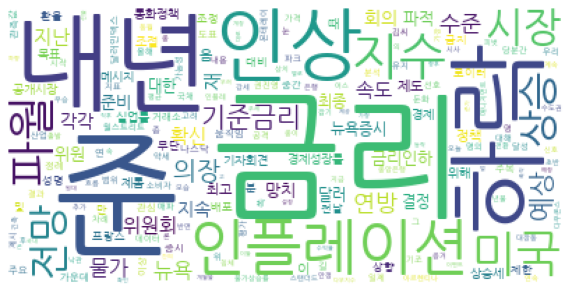

In [22]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", font_path=FONT_PATH)
wc.generate_from_frequencies(counted_tokens)
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)